In [ ]:
#all important stuff to make sure code runs well
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import itertools
import random
from sklearn import svm
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
random.seed(42)

#loading the data set
data = pd.read_csv('cardio_train.csv', sep = ';')

In [ ]:
#############################data preprocessing##################################
#check for null values
null_rows = data[data.isnull().any(axis=1)].head()
print(null_rows.head())#-->no null values

#check whether data set is balanced
sick = data['cardio'].value_counts()[1]
healthy = len(data) - data['cardio'].value_counts()[1]
print("sick: ", sick, "individuals; healthy: ", healthy, "individuals")

Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []
sick:  34979 individuals; healthy:  35021 individuals


In [ ]:
#check correlations of features to target value
print(data.corr()['cardio'])
data_target = data['cardio']

#dropping the label column & id feature
data = data.drop(columns=['cardio', 'id', 'height'])

#convert age to years so we can interpret it better
data['age'] = data['age'] / 365

#one-hot encoding the categorical features & normalizing the numerical features
numerical_features = ['age', 'weight', 'ap_hi', 'ap_lo']
categorical_features = ['gender', 'cholesterol', 'gluc',	'smoke',	'alco','active']
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
     ("cat", OneHotEncoder(), categorical_features)
    ])

data = full_pipeline.fit_transform(data)

id             0.003799
age            0.238159
gender         0.008109
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
cardio         1.000000
Name: cardio, dtype: float64


In [ ]:
def plot_roc_curve(target, score, kernel):
    fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(target, score)
    plt.figure(1)
    plt.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
    plt.title("ROC curve with SVM ("+kernel+")")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    # Print the area under ROC, which is also called "AUC (Area Under the ROC curve)"
    aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
    print('AUC of ROC: ', aucroc)

def print_metrics(target, predicted):
    print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target, predicted)))
    print("%-12s %f" % ('F1 Score:', metrics.f1_score(target, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))

In [ ]:
train, test, target, target_test = train_test_split(data, data_target, test_size = 0.3, random_state = 42)

clf = svm.SVC(kernel = 'linear', probability = True)
clf.fit(train, target)
predicted = clf.predict(test)
score = clf.predict_proba(test)[:,1]
print_metrics(target_test, predicted)
plot_roc_curve(target_test, score, "linear")

Accuracy:    0.733524
F1 Score:    0.723135


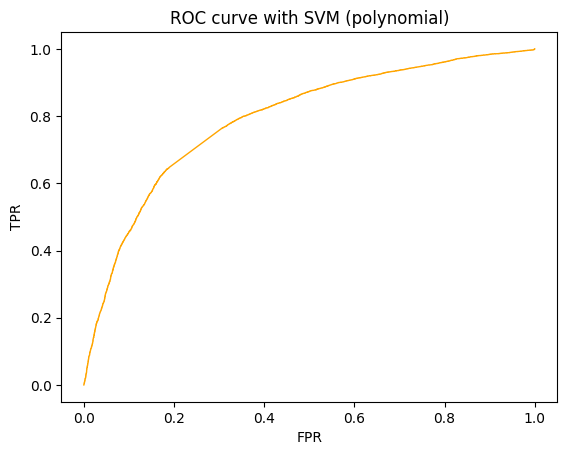

AUC of ROC:  0.7915045521852505


In [ ]:
train, test, target, target_test = train_test_split(data, data_target, test_size = 0.3, random_state = 42)

clf = svm.SVC(kernel = 'poly', probability = True)
clf.fit(train, target)
predicted = clf.predict(test)
score = clf.predict_proba(test)[:,1]
print_metrics(target_test, predicted)
plot_roc_curve(target_test, score, "polynomial")

Accuracy:    0.733905
F1 Score:    0.727441


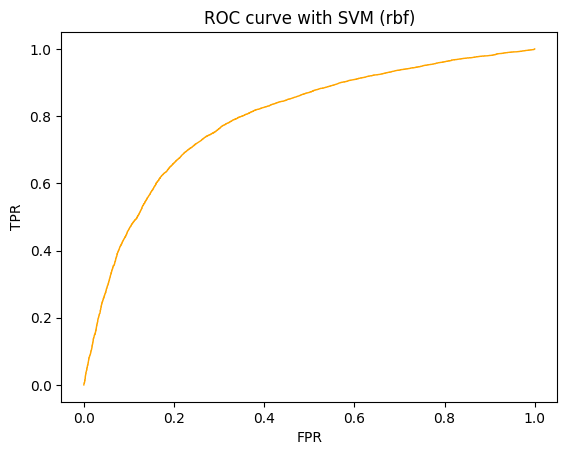

AUC of ROC:  0.7928172823137087


In [ ]:
train, test, target, target_test = train_test_split(data, data_target, test_size = 0.3, random_state = 42)

clf = svm.SVC(kernel = 'rbf', probability = True)
clf.fit(train, target)
predicted = clf.predict(test)
score = clf.predict_proba(test)[:,1]
print_metrics(target_test, predicted)
plot_roc_curve(target_test, score, "rbf")

In [ ]:
train, test, target, target_test = train_test_split(data, data_target, test_size = 0.3, random_state = 42)

clf = svm.SVC(kernel = 'sigmoid', probability = True)
clf.fit(train, target)
predicted = clf.predict(test)
score = clf.predict_proba(test)[:,1]
print_metrics(target_test, predicted)
plot_roc_curve(target_test, score, "sigmoid")

In [ ]:
print(np.isnan(data))
print(np.isnan(data_target))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Name: cardio, Length: 70000, dtype: bool


In [ ]:
from sklearn import model_selection
train, test, target, target_test = train_test_split(data, data_target, test_size = 0.3, random_state = 42)

kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)
svc_model_kfold = SVC(kernel = 'linear', probability = True)
svc_results_kfold = model_selection.cross_val_score(svc_model_kfold, train, target, cv=kfold)
print("For an SVM Regression (Linear) our mean accuracy across folds is: %.2f%%" % (svc_results_kfold.max() * 100.0))

KeyboardInterrupt: 

In [ ]:
kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)
svc_model_kfold = SVC(kernel = 'poly', probability = True)
svc_results_kfold = model_selection.cross_val_score(svc_model_kfold, train, target, cv=kfold)
print("For an SVM Regression (Polynomial) our mean accuracy across folds is: %.2f%%" % (svc_results_kfold.max() * 100.0))

For an SVM Regression (Linear) our mean accuracy across folds is: 73.38%


In [ ]:
kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)
svc_model_kfold = SVC(kernel = 'rbf', probability = True)
svc_results_kfold = model_selection.cross_val_score(svc_model_kfold, train, target, cv=kfold)
print("For an SVM Regression (RBF) our max accuracy across folds is: %.2f%%" % (svc_results_kfold.max() * 100.0))

For an SVM Regression (Linear) our max accuracy across folds is: 73.53%


In [ ]:
from sklearn import model_selection
train, test, target, target_test = train_test_split(data, data_target, test_size = 0.3, random_state = 42)

kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)
svc_model_kfold = SVC(kernel = 'rbf', probability = True)
svc_results_kfold = model_selection.cross_val_score(svc_model_kfold, train, target, cv=kfold)
print("For an SVM Regression (RBF) our max accuracy across folds is: %.2f%%" % (svc_results_kfold.max() * 100.0))

For an SVM Regression (RBF) our max accuracy across folds is: 73.53%


In [ ]:
from sklearn import model_selection
train, test, target, target_test = train_test_split(data, data_target, test_size = 0.3, random_state = 42)
kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)
svc_model_kfold = SVC(kernel = 'sigmoid', probability = True)
svc_results_kfold = model_selection.cross_val_score(svc_model_kfold, train, target, cv=kfold)
print("For an SVM Regression (Sigmoid) our mean accuracy across folds is: %.2f%%" % (svc_results_kfold.max() * 100.0))